<a href="https://colab.research.google.com/github/karnali/covid_19_colab/blob/master/coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Reading the dataset https://github.com/CSSEGISandData/2019-nCoV
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-06-2020.csv')
                 

In [128]:
# Let's look at the various columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
Province/State    108 non-null object
Country/Region    199 non-null object
Last Update       199 non-null object
Confirmed         199 non-null int64
Deaths            199 non-null int64
Recovered         199 non-null int64
Latitude          199 non-null float64
Longitude         199 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 12.6+ KB


In [129]:
df.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,511.557789,17.386935,280.733668,31.834801,5.594724
std,4828.578915,208.262669,2982.451828,20.589276,88.889546
min,0.000000,0.000000,0.000000,-41.454500,-123.869500
25%,1.000000,0.000000,0.000000,27.612200,-79.280650
50%,5.000000,0.000000,0.000000,36.342700,12.000000
75%,51.500000,0.000000,3.500000,42.992450,101.243500
max,67592.000000,2931.000000,42033.000000,64.963100,174.886000


In [130]:
# Countries affected
countries = df['Country/Region'].unique().tolist()
# print(countries)

print("\nTotal countries affected by virus: ",len(countries))


Total countries affected by virus:  99


In [131]:
#Combining China and Mainland China cases
df['Country/Region'].replace({'Mainland China':'China'},inplace=True)
countries = df['Country/Region'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus: ",len(countries))



['China', 'South Korea', 'Iran', 'Italy', 'Others', 'Germany', 'France', 'Japan', 'Spain', 'Switzerland', 'UK', 'Singapore', 'Netherlands', 'Belgium', 'Norway', 'Hong Kong', 'Sweden', 'Malaysia', 'Bahrain', 'Kuwait', 'US', 'Austria', 'Thailand', 'Greece', 'Taiwan', 'Iceland', 'Iraq', 'India', 'United Arab Emirates', 'Australia', 'Canada', 'Denmark', 'Lebanon', 'Israel', 'San Marino', 'Czech Republic', 'Ireland', 'Algeria', 'Oman', 'Palestine', 'Vietnam', 'Egypt', 'Finland', 'Brazil', 'Ecuador', 'Portugal', 'Russia', 'Croatia', 'Estonia', 'Macau', 'Romania', 'Qatar', 'Slovenia', 'Azerbaijan', 'Belarus', 'Mexico', 'Pakistan', 'Philippines', 'Poland', 'Saudi Arabia', 'Chile', 'Georgia', 'Indonesia', 'New Zealand', 'Senegal', 'North Macedonia', 'Saint Barthelemy', 'Argentina', 'Bosnia and Herzegovina', 'Dominican Republic', 'Hungary', 'Luxembourg', 'Morocco', 'Afghanistan', 'Andorra', 'Armenia', 'Bhutan', 'Cambodia', 'Cameroon', 'Colombia', 'Costa Rica', 'Faroe Islands', 'Gibraltar', 'Jord

In [132]:
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)

# Creating a dataframe with total no of confirmed cases for every Country/Region
Number_of_countries = len(df['Country/Region'].value_counts())
cases = pd.DataFrame(df.groupby('Country/Region')['Confirmed','Deaths'].sum())
cases['Country/Region'] = cases.index
global_cases = cases[['Confirmed','Deaths']]

dfsort = global_cases.sort_values(by = ['Deaths'], ascending = False)
print ("Countries sorted by most deaths")
display(dfsort)
dfsort.to_csv('today.csv',index=True)


Countries sorted by most deaths


,Confirmed,Deaths
Country/Region,,
China,80573,3042
Italy,4636,197
Iran,4747,124
South Korea,6593,42
US,278,14
France,653,9
Japan,420,6
Others,696,6
Spain,400,5


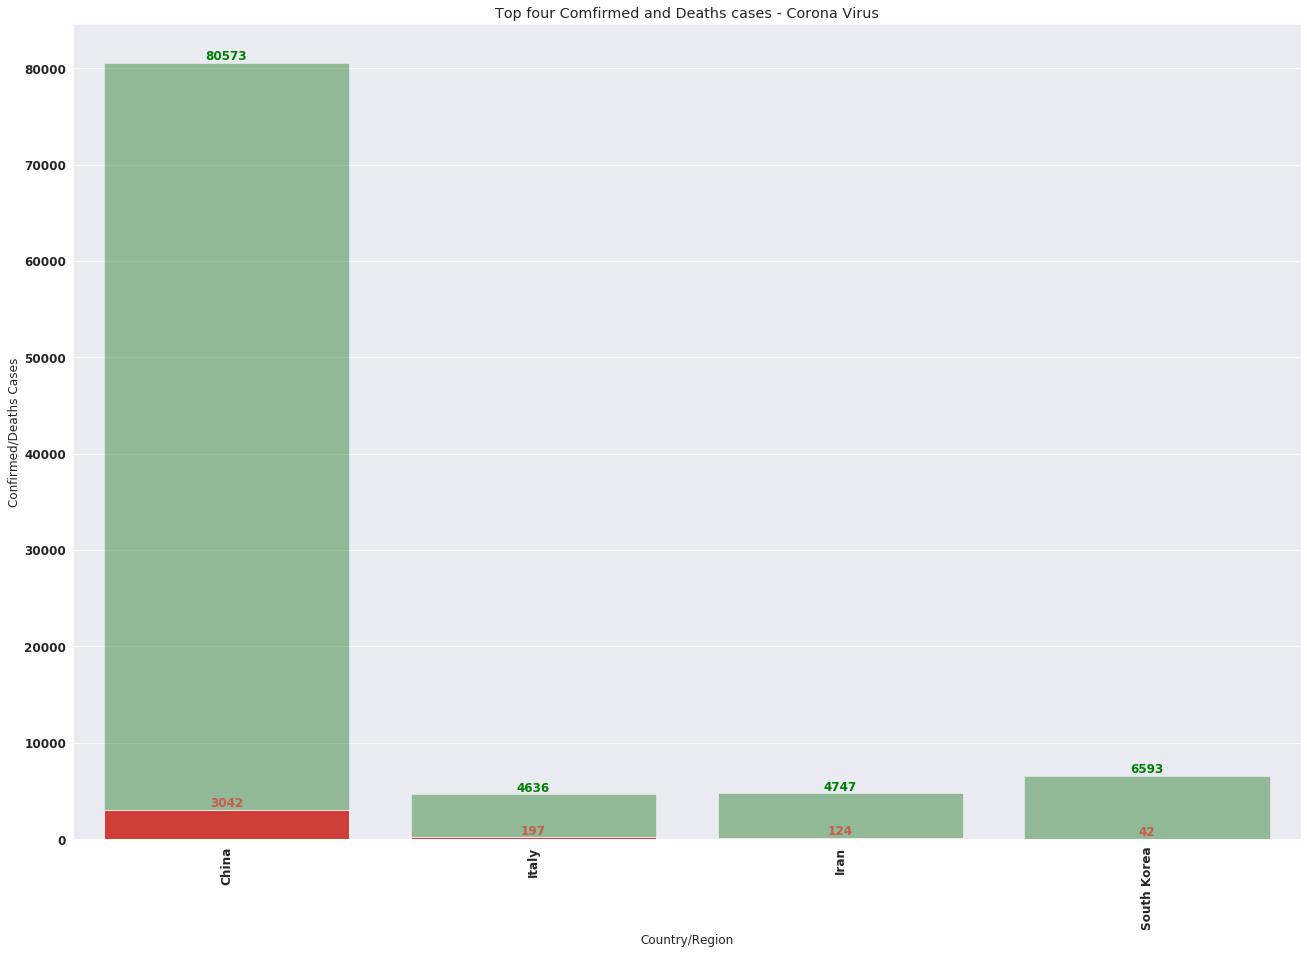

In [133]:
sns.set_style("darkgrid")
#plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.figure(figsize=(22,15))
plt.rcParams['font.family'] = "Arial Bold"
plt.rcParams['font.size'] = "12"

dfglobal = pd.read_csv("today.csv",  skiprows = range(5,200))

g =sns.barplot(x='Country/Region',y='Confirmed',color='Green', alpha=0.4, data=dfglobal)
g =sns.barplot(x='Country/Region',y='Deaths',color='red', alpha=0.8, data=dfglobal)
g.set_ylabel('Confirmed/Deaths Cases')

for index, row in dfglobal.iterrows():
    g.text(row.name,row.Confirmed, round(row.Confirmed,2), color='Green', ha='center', va='bottom')
    g.text(row.name,row.Deaths, round(row.Deaths,2), color='red', alpha=0.5, ha='center', va='bottom')

plt.title('Top four Comfirmed and Deaths cases - Corona Virus')
g.set_xticklabels(dfglobal['Country/Region'], rotation='vertical', fontsize=12)
plt.show()


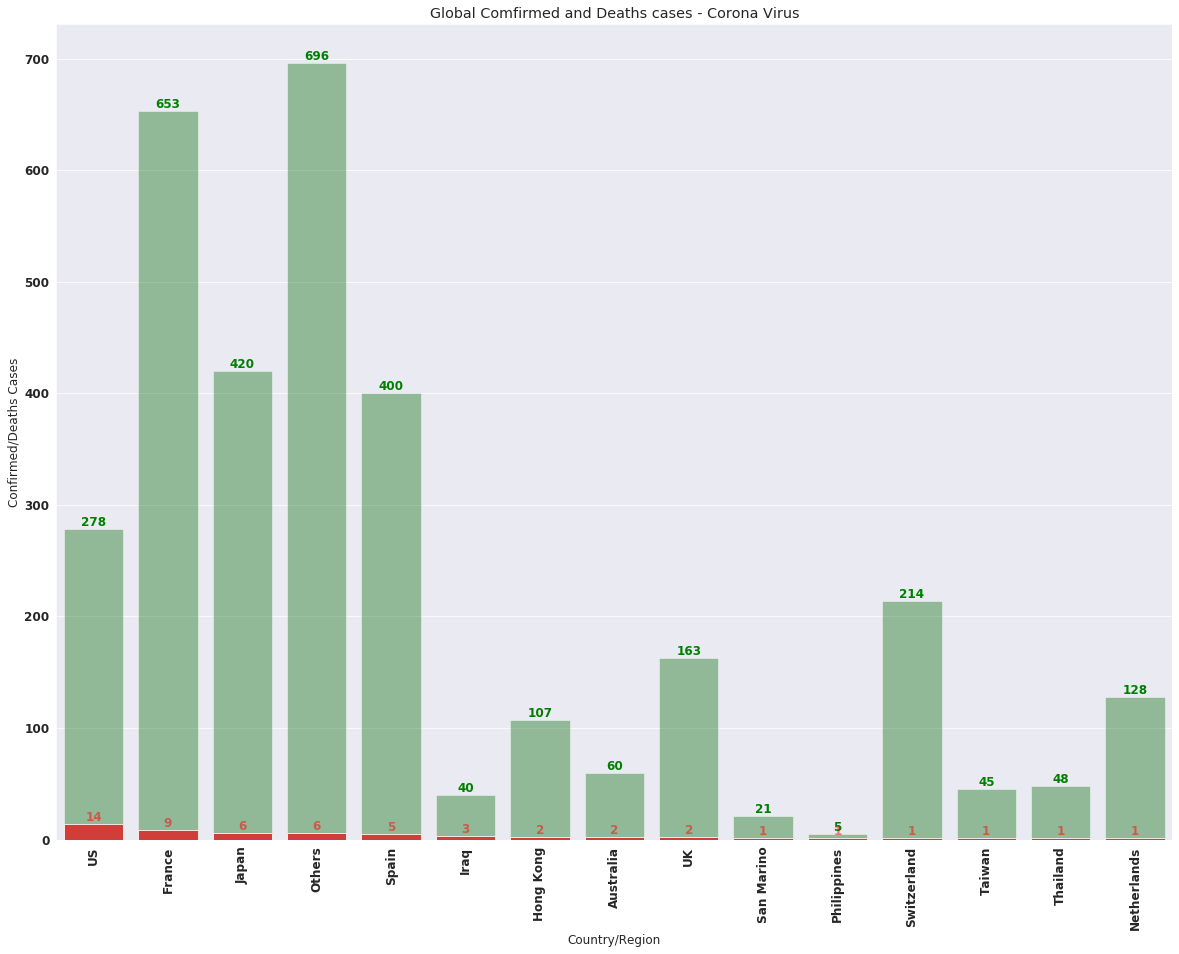

In [134]:
sns.set_style("darkgrid")
nbr_rows_to_skip = range(1,5)
nbr_rows_to_read = 15 
#plt.rcParams['figure.figsize'] = (22.0, 15.0)
plt.figure(figsize=(20,15))
plt.rcParams['font.family'] = "Arial Bold"
plt.rcParams['font.size'] = "12"

dfglobal = pd.read_csv("today.csv",  nrows=nbr_rows_to_read, skiprows=nbr_rows_to_skip)

g =sns.barplot(x='Country/Region',y='Confirmed',color='Green', alpha=0.4, data=dfglobal)
g =sns.barplot(x='Country/Region',y='Deaths',color='red', alpha=0.8, data=dfglobal)
g.set_ylabel('Confirmed/Deaths Cases')

for index, row in dfglobal.iterrows():
    g.text(row.name,row.Confirmed, round(row.Confirmed,2), color='Green', ha='center', va='bottom')
    g.text(row.name,row.Deaths, round(row.Deaths,2), color='red', alpha=0.5, ha='center', va='bottom')

plt.title('Global Comfirmed and Deaths cases - Corona Virus')
g.set_xticklabels(dfglobal['Country/Region'], rotation='vertical', fontsize=12)
plt.show()